In [3]:
# Inferential statistics
# 1. Confidence intervals
# 2. Hypothesis testing
# 3. A/B testing

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Hypothesis testing
perf_scores = np.array([50, 55, 60, 68, 75, 85, 92, 100, 105, 110, 120])
perf_scores_mean = np.mean(perf_scores)

# Null hypothesis: the mean performance score is 100
# Alternative hypothesis: the mean performance score is not 100

# One-sample t-test
null_hypothesis = 100
t_stat, p_val = stats.ttest_1samp(perf_scores, null_hypothesis)
print('t-statistic:', t_stat)
print('p-value:', p_val)
print('Mean performance score:', perf_scores_mean)

# Two-tailed test
alpha = 0.05
if p_val < alpha:
    print(f'Null hypothesis : {null_hypothesis}; Mean Performance Score : {perf_scores_mean}.  Reject null hypothesis')
else:
    print(f'Null hypothesis : {null_hypothesis}; Mean Performance Score : {perf_scores_mean}. Fail to reject null hypothesis')

# Confidence intervals
# 95% confidence interval
conf_int = stats.t.interval(0.95, len(perf_scores)-1, loc=np.mean(perf_scores), scale=stats.sem(perf_scores))
print('95% confidence interval:', conf_int)


t-statistic: -2.2847497021037397
p-value: 0.0454174346868711
Mean performance score: 83.63636363636364
Null hypothesis : 100; Mean Performance Score : 83.63636363636364.  Reject null hypothesis
95% confidence interval: (67.67818059877638, 99.5945466739509)


t-statistic: 0.4163099565695098
Fail to reject null hypothesis
95% confidence interval for group A: (67.67818059877638, 99.5945466739509)
95% confidence interval for group B: (68.8593057401753, 91.1406942598247)


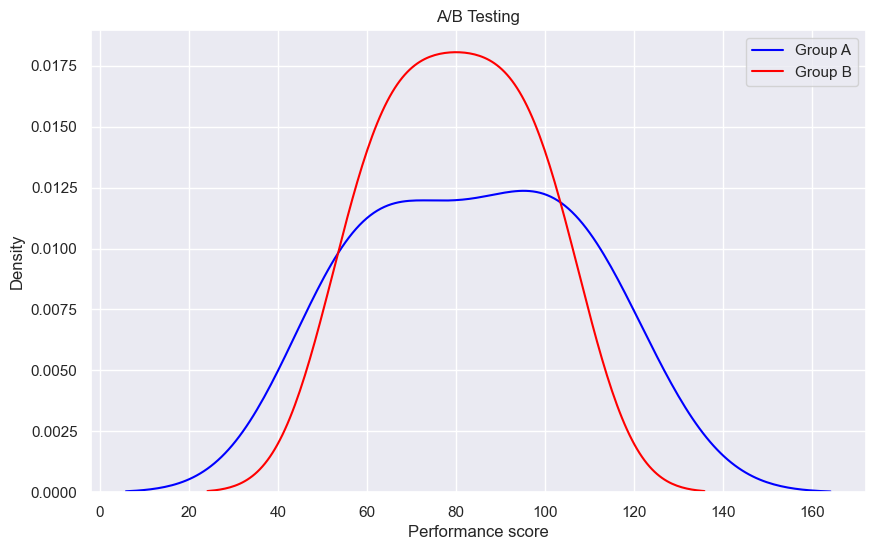

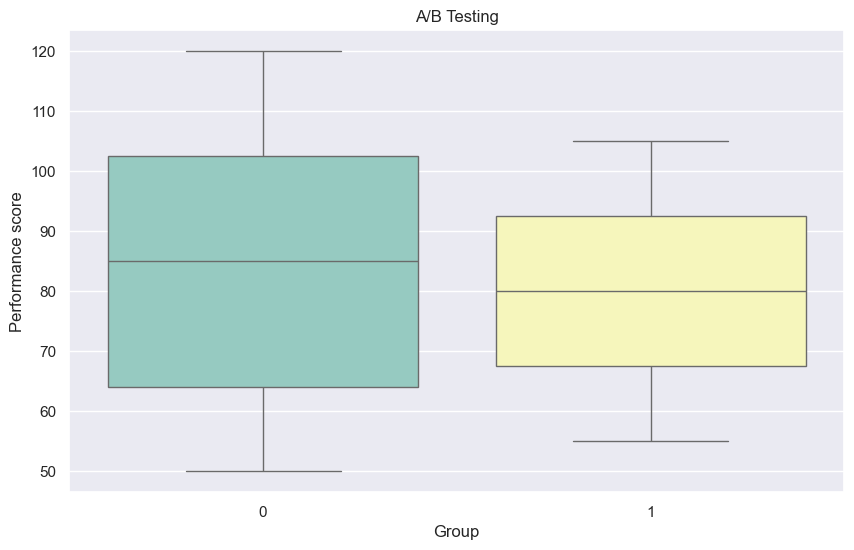

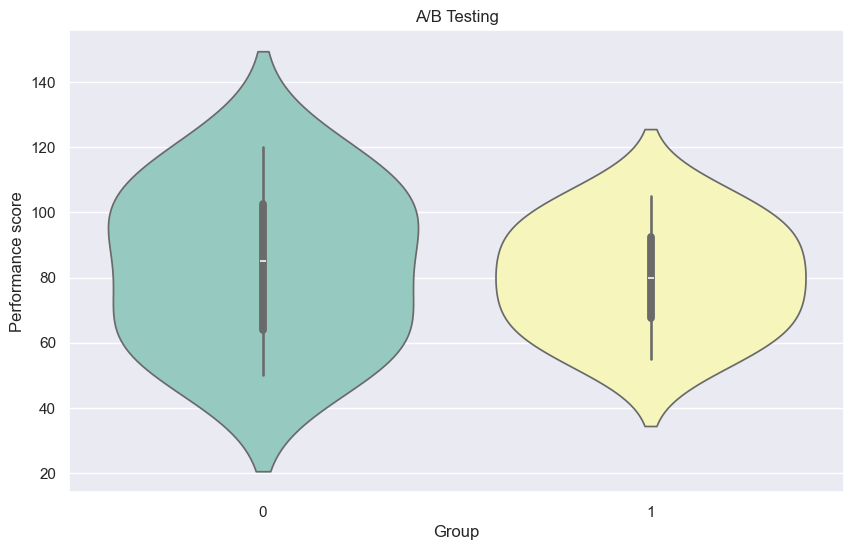

In [4]:
# A/B testing
# Two-sample t-test
# Null hypothesis: the mean performance scores of two groups are equal
# Alternative hypothesis: the mean performance scores of two groups are not equal

# Group A
group_a = np.array([50, 55, 60, 68, 75, 85, 92, 100, 105, 110, 120])
group_a_mean = np.mean(group_a)

# Group B
group_b = np.array([55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105])
group_b_mean = np.mean(group_b)

# Two-sample t-test
t_stat, p_val = stats.ttest_ind(group_a, group_b)
print('t-statistic:', t_stat)

# Two-tailed test
alpha = 0.05
if p_val < alpha:
    print('Reject null hypothesis') 
else:
    print('Fail to reject null hypothesis')

# Confidence intervals
# 95% confidence interval
conf_int = stats.t.interval(0.95, len(group_a)-1, loc=np.mean(group_a), scale=stats.sem(group_a))
print('95% confidence interval for group A:', conf_int)

conf_int = stats.t.interval(0.95, len(group_b)-1, loc=np.mean(group_b), scale=stats.sem(group_b))
print('95% confidence interval for group B:', conf_int)


# Plotting
sns.set()
plt.figure(figsize=(10, 6))
sns.kdeplot(group_a, color='blue', label='Group A')
sns.kdeplot(group_b, color='red', label='Group B')
plt.xlabel('Performance score')
plt.ylabel('Density')
plt.title('A/B Testing')
plt.legend()
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[group_a, group_b], palette='Set3')
plt.xlabel('Group')
plt.ylabel('Performance score')
plt.title('A/B Testing')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=[group_a, group_b], palette='Set3')
plt.xlabel('Group')
plt.ylabel('Performance score')
plt.title('A/B Testing')
plt.show()

# Bar plot
group_a_mean = np.mean(group_a)
group_b_mean = np.mean(group_b)
group_means = [group_a_mean, group_b_mean]
